In [32]:
#How to hashtag alt på en gang:  alt + shift marker alt men kun ude i siden - slip! og så lav hashtag
# marker et ord - command + D så kan man rette i alle ord samtidig

#hallo emilie prøv lige at udvælge features for du optimerer hyperparameters

import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import shap


from sklearn import metrics
import lightgbm as ltb
import warnings
warnings.filterwarnings("ignore")

# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn import preprocessing

In [31]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

display(test)

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1,index
0,82715785.0,300000.0,55.500000,55.500000,55.500000,55.500000,55.500000,55.500000,25.0,3.0,...,31315.462891,34428.593750,-114.604591,7236.436523,31362.933594,35057.257812,-323.635437,7236.436523,31362.933594,0.0
1,87776805.0,300000.0,34.490002,34.490002,34.490002,34.490002,34.490002,34.490002,17.0,2.0,...,11161.533203,18553.693359,164.311783,25511.509766,10993.912109,19125.595703,-31.031605,25511.509766,11126.732422,1.0
2,88374971.0,300000.0,10.500000,10.500000,10.500000,10.500000,10.500000,10.500000,7.0,2.0,...,38468.578125,168862.281250,1686.837524,0.000000,38595.757812,173636.875000,1568.235352,0.000000,38578.878906,2.0
3,90188646.0,300000.0,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,20.0,3.0,...,39400.394531,47991.351562,254.431152,11802.980469,39751.097656,49673.574219,1032.851807,11802.980469,39751.097656,3.0
4,33479601.0,300000.0,40.500000,40.500000,40.500000,40.500000,40.500000,40.500000,31.0,7.0,...,31813.449219,66441.101562,2146.472168,8995.112305,32713.642578,70718.359375,2927.506104,8995.112305,32647.580078,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160646,83224363.0,300000.0,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,10.0,4.0,...,57191.355469,144228.375000,709.250000,0.000000,57082.277344,150338.828125,857.790405,0.000000,57082.277344,160646.0
160647,7755019.0,300000.0,23.500000,23.500000,23.500000,23.500000,23.500000,23.500000,11.0,2.0,...,26484.082031,109270.625000,583.594971,0.000000,30521.910156,121041.343750,1390.935059,0.000000,30521.910156,160647.0
160648,30078874.0,300000.0,24.490000,24.490000,24.490000,24.490000,24.490000,24.490000,10.0,1.0,...,15322.294922,100385.117188,5082.523438,0.000000,16207.693359,102540.796875,5203.945801,0.000000,16207.693359,160648.0
160649,21433700.0,300000.0,45.500000,45.500000,45.500000,45.500000,45.500000,45.500000,26.0,7.0,...,32152.722656,41132.343750,542.427185,18163.388672,33373.300781,44453.101562,953.256653,18163.388672,33373.300781,160649.0


In [3]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]

chosen_variables = ['p_deltaPhiRescaled2', 'p_deltaEta1', 'p_ptconecoreTrackPtrCorrection', 'p_sigmad0', 'p_d0Sig', 'p_Rphi', 'p_d0', 'p_Reta', 'p_dPOverP', 'p_EptRatio', 'p_deltaPhiFromLastMeasurement', 'p_nTracks', 'p_deltaPhi2', 'p_TRTPID', 'p_ambiguityType']
X = train[chosen_variables]
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#X_train_cut = X_train[:10000]
#X_test_cut = X_test[:10000]
#y_train_cut = y_train[:10000]
#y_test_cut = y_test[:10000]
#
X_train_cut = X_train
X_test_cut = X_test
y_train_cut = y_train
y_test_cut = y_test

# Reset the index of y_test_cut
#y_test_cut = y_test_cut.reset_index(drop=True)

In [4]:
scaler = preprocessing.StandardScaler().fit(X_train_cut)
scaler.mean_
scaler.scale_
X_train_cut = scaler.transform(X_train_cut)
#print(X_train_cut)

print(X_train_cut.mean(axis=0))
print(X_train_cut.std(axis=0))

scaler = preprocessing.StandardScaler().fit(X_test_cut)
scaler.mean_
scaler.scale_
X_test_cut = scaler.transform(X_test_cut)
#print(X_test_cut)

print(X_test_cut.mean(axis=0))
print(X_test_cut.std(axis=0))

[-9.32815079e-19 -4.95558011e-19 -1.39922262e-18 -2.07551355e-17
 -1.63242639e-18 -1.58345360e-16 -6.99611309e-19  2.02974731e-16
  5.85341462e-17 -2.42531920e-17 -2.04490556e-17  4.61160455e-17
  1.23597998e-17  2.18045525e-17 -6.48306480e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 8.04553005e-18 -1.04941696e-18 -7.08356450e-18 -6.99611309e-19
 -3.14825089e-18  3.60124921e-16  2.62354241e-19  6.93664613e-16
 -6.29650178e-18 -2.79844524e-17 -5.24708482e-19 -1.25230424e-16
 -1.32926149e-17  1.95891167e-17  4.21515814e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:

# build a model
model = Sequential()
model.add(Dense(100, input_shape=(X_train_cut.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.optimizer.get_config()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1600      
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,801
Trainable params: 11,801
Non-trainable params: 0
_________________________________________________________________


{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [12]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_cut,
                    y_train_cut,
                    callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    batch_size=50,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/100
1950/1950 [==============================] - 8s 3ms/step - loss: 0.2401 - accuracy: 0.9073 - val_loss: 0.2294 - val_accuracy: 0.9124
Epoch 2/100
1950/1950 [==============================] - 6s 3ms/step - loss: 0.2145 - accuracy: 0.9156 - val_loss: 0.2062 - val_accuracy: 0.9173
Epoch 3/100
1950/1950 [==============================] - 6s 3ms/step - loss: 0.2035 - accuracy: 0.9192 - val_loss: 0.1964 - val_accuracy: 0.9191
Epoch 4/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.1962 - accuracy: 0.9215 - val_loss: 0.1921 - val_accuracy: 0.9238
Epoch 5/100
1950/1950 [==============================] - 6s 3ms/step - loss: 0.1916 - accuracy: 0.9236 - val_loss: 0.1900 - val_accuracy: 0.9234
Epoch 6/100
1950/1950 [==============================] - 6s 3ms/step - loss: 0.1885 - accuracy: 0.9260 - val_loss: 0.1886 - val_accuracy: 0.9254
Epoch 7/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.1863 - accuracy: 0.9260 - val_loss: 0.1880 - val_ac

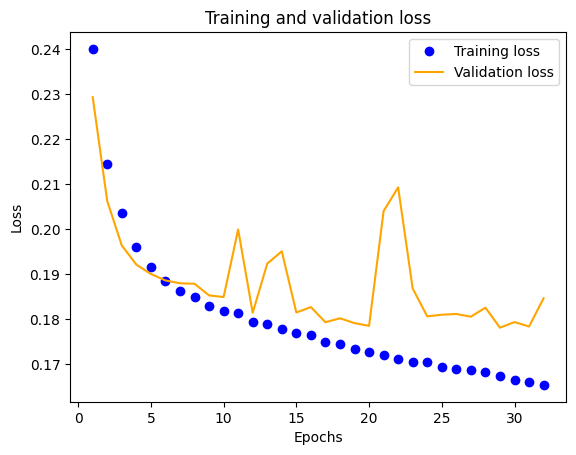

In [13]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

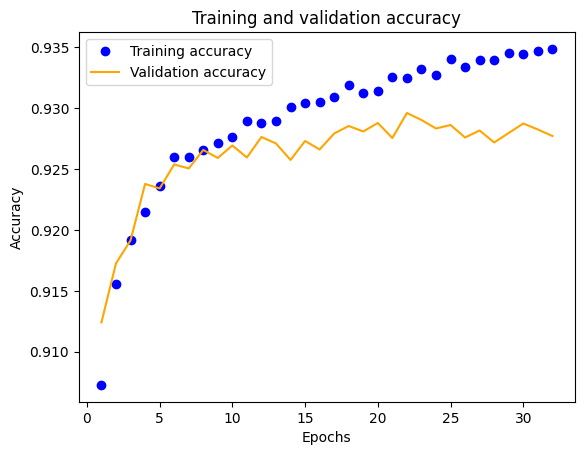

0.9296000003814697

In [14]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(X_test_cut) # prob of successes (survival)
np.round(model.predict(X_test_cut),0) # 1 and 0 (survival or not)
 # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X_test_cut),0)

# confusion matrix
print(confusion_matrix(y_test_cut, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test_cut, preds))
##               precision    recall  f1-score   support
## 
##            0       0.82      0.89      0.86       549
##            1       0.80      0.69      0.74       340
## 
##     accuracy                           0.82       889
##    macro avg       0.81      0.79      0.80       889
## weighted avg       0.81      0.82      0.81       889

[[ 7918  2224]
 [ 4040 26443]]
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72     10142
         1.0       0.92      0.87      0.89     30483

    accuracy                           0.85     40625
   macro avg       0.79      0.82      0.81     40625
weighted avg       0.86      0.85      0.85     40625



In [16]:
def counter(predictions):
    ones = np.count_nonzero(predictions == 1)
    total = len(predictions)
    frac = ones/total
    return frac

print(counter(y_train))
print(counter(y_test))
print(counter(preds))

0.7467651282051282
0.7503507692307693
0.7056492307692308


In [29]:
prob = model.predict(X_test_cut) # prob of successes (survival)
preds = np.round(model.predict(X_test_cut))

print(prob[10:20])
print(preds[10:20])

[[0.5174616 ]
 [0.48692444]
 [0.5247408 ]
 [0.50656813]
 [0.5409545 ]
 [0.5094463 ]
 [0.49793795]
 [0.5168043 ]
 [0.6490507 ]
 [0.534649  ]]
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [28]:
print(np.round(0.48692444,0))

0.0


In [ ]:
lr = 0.0115
15
160
160
150
1

batchsize = 1000

epocs = 33